<a href="https://colab.research.google.com/github/VenkyAdi/Web-Scraping-Exploring-Data-Science-Job-Opportunities-/blob/main/Numerical_Programming_in_Python_Web_Scraping_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploring Data Science Job Opportunities 🔍🚀**

Your mission is to design a specialized tool that extracts and analyzes data science job listings from a single online source of your choice. Focus on crafting a laser-focused web scraping solution tailored to the chosen platform, ensuring the collection of crucial details such as job titles, company names, experience requirements, salary ranges, and locations.

### **Key Tasks:**

1. **Source Selection:**
Choose a preferred online platform for data science job listings. Platforms like TimesJobs, LinkedIn Jobs, Indeed, Naukri, Glassdoor are potential options. Specify your chosen source in your solution. 🎯
2. **Web Scraping Precision:**
Engineer a targeted web scraping mechanism adept at extracting specific information from the chosen platform. ⚙️
3. **Data Extraction:**
Focus on extracting essential details from job listings, including but not limited to job titles, company names, required experience levels, salary ranges, and locations. 📊
4. **Data Organization:**
Ensure efficient organization and cleaning of the extracted data. The emphasis should be on presenting the information in a clear and understandable format.🧹
5. **Insights Generation:**
Develop tools for analyzing the gathered data to generate insights. Explore patterns related to job titles, experience requirements, salary distributions, and geographic preferences. 🔍
6. **Visualization:**
Create visual representations such as charts and graphs to communicate the insights effectively. Your visuals should provide a user-friendly interpretation of the data. 📈

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


data = []

html_text = requests.get("https://www.timesjobs.com/candidate/job-search.html?searchType=personalizedSearch&from=submit&txtKeywords=%22Data+Scientist%22&txtLocation=banglore").text
soup = BeautifulSoup(html_text, 'html.parser')

jobs = soup.find_all('li', class_='clearfix job-bx wht-shd-bx')

for job in jobs:
    company_name = job.find('h3', class_='joblist-comp-name')
    skills = job.find('span', class_='srp-skills')
    job_publish_date = job.find('span', class_='sim-posted')
    more_info = job.header.h2.a['href'] if job.header.h2.a else None
    experience_level_container = job.find('ul', class_='top-jd-dtl clearfix')
    location_container = job.find('ul',class_ ='top-jd-dtl clearfix')


    if experience_level_container:
        experience_level_element = experience_level_container.find('li')

    if location_container:
      location_element = location_container.find('span')


    if company_name and skills and job_publish_date:
        company_name = company_name.text.replace('\r\n', '').strip()
        skills = skills.text.replace('\r\n', '').strip()
        job_publish_date = job_publish_date.text.replace('\r', '').replace('Posted ', '').replace('\t', ' ').replace(' ', '').strip()
        experience_level = experience_level_element.text.replace('\r', '').replace('card_travel', '').replace('\t', '').replace(' ', '').strip()
        location = location_element.text.strip()


        data.append([company_name, skills, experience_level,location,job_publish_date, more_info])


df = pd.concat([pd.DataFrame(data, columns=['Company Name', 'Skills Required',' Experience_level', 'Location','Job Publish Date', 'Apply'])],
               ignore_index=True)


In [ ]:
df

,Company Name,Skills Required,Experience_level,Location,Job Publish Date,Apply
0,Phoenix Global Resettlement Services Pvt Ltd\n...,"Analytical studies , sparkSQL , Data scien...",3-8yrs,Bengaluru / Bangalore,amonthago,https://www.timesjobs.com/job-detail/data-scie...
1,2COMS Consulting Pvt Ltd\n (More Jobs),Data science,4-6yrs,Bengaluru / Bangalore,fewdaysago,https://www.timesjobs.com/job-detail/data-scie...
2,2COMS Consulting Pvt Ltd\n (More Jobs),Data science,4-6yrs,Bengaluru / Bangalore,amonthago,https://www.timesjobs.com/job-detail/data-scie...
3,2COMS Consulting Pvt Ltd\n (More Jobs),Data science,4-6yrs,Bengaluru / Bangalore,amonthago,https://www.timesjobs.com/job-detail/data-scie...
4,HR Empower Consultancy\n (More Jobs),"Python , SLQ , Java , c ++ , Hadoop ,...",0-1yrs,"Ahmedabad, Bengaluru / Bangalore, Chennai, ...",WorkfromHome\n\namonthago,https://www.timesjobs.com/job-detail/data-scie...
5,BizViz Technologies,"data mining , sql , data scientist , pre...",3-6yrs,"Hyderabad/Secunderabad, Bengaluru / Bangalore",fewdaysago,https://www.timesjobs.com/job-detail/data-scie...
6,string bio pvt. ltd,"algorithms , c , data mining , sql , ...",2-5yrs,Bengaluru / Bangalore,5daysago,https://www.timesjobs.com/job-detail/data-scie...
7,ai enterprise,"algorithms , python , apache",5-8yrs,Bengaluru / Bangalore,5daysago,https://www.timesjobs.com/job-detail/data-scie...
8,aeries technology group ( sabre industries ),"hive , fundamentals , algorithms , infor...",5-8yrs,"Hyderabad/Secunderabad, Mumbai, Bengaluru / ...",5daysago,https://www.timesjobs.com/job-detail/data-scie...
9,the modern dimension,"Information Systems , Computer Science , ...",2-5yrs,"Delhi, Delhi/NCR, Bengaluru / Bangalore",fewdaysago,https://www.timesjobs.com/job-detail/data-scie...


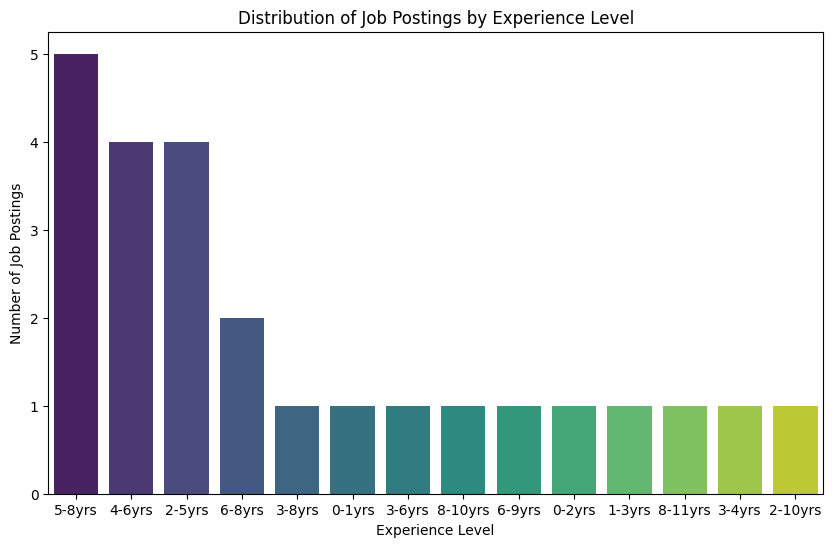

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns




experience_counts = df[' Experience_level'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=experience_counts.index, y=experience_counts, palette="viridis")

plt.xlabel('Experience Level')
plt.ylabel('Number of Job Postings')
plt.title('Distribution of Job Postings by Experience Level')

plt.show()


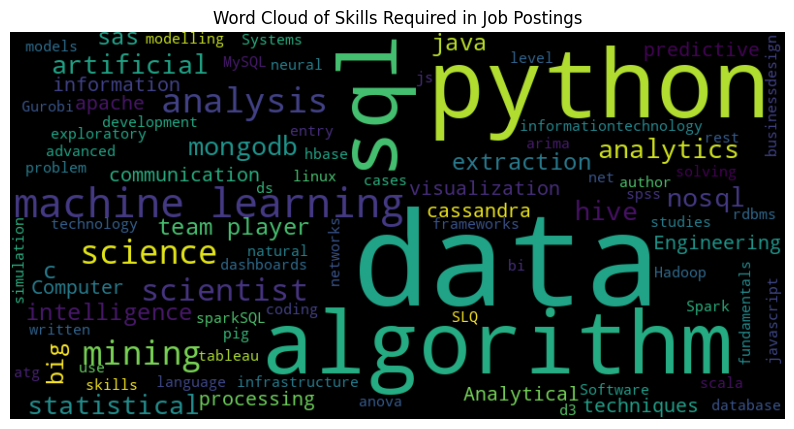

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

skills_text = ' '.join(df['Skills Required'])

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(skills_text)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Skills Required in Job Postings')
plt.show()
